In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error

In [3]:
# TODO: enter your ETF ticker, dates, and price interval
# set parameters for data pull
ticker = 'SPY'
start_date = '2010-01-01'
end_date = '2023-12-31'
interval = '1d'

# access data and display
df_etf = yf.download(ticker, start = start_date, end = end_date, interval= interval)

df_etf_backup = df_etf.copy(deep=True)

df_etf.drop(columns=['Open','High','Low','Close','Volume'], inplace=True)

print(df_etf)

[*********************100%%**********************]  1 of 1 completed

             Adj Close
Date                  
2010-01-04   86.860077
2010-01-05   87.089996
2010-01-06   87.151329
2010-01-07   87.519188
2010-01-08   87.810425
...                ...
2023-12-22  472.182892
2023-12-26  474.176697
2023-12-27  475.034058
2023-12-28  475.213501
2023-12-29  473.837769

[3522 rows x 1 columns]


In [4]:
# Gabe

g_df_etf = df_etf.copy(deep = True)
g_df_etf['Today\'s Returns'] = (g_df_etf['Adj Close']/g_df_etf['Adj Close'].shift() - 1)
g_df_etf['Yesterday\'s Returns'] = (g_df_etf['Today\'s Returns'].shift(1))
g_df_etf['Two Days Ago Returns'] = (g_df_etf['Today\'s Returns'].shift(2))
g_df_etf['Last Week\'s Returns'] = (g_df_etf['Adj Close']/g_df_etf['Adj Close'].shift(7) - 1)
g_df_etf['Last Month\'s Returns'] = (g_df_etf['Adj Close']/g_df_etf['Adj Close'].shift(30) - 1)
g_df_etf = g_df_etf.rename(columns={'Adj Close': 'Spot Price'})

g_df_etf

,Spot Price,Today's Returns,Yesterday's Returns,Two Days Ago Returns,Last Week's Returns,Last Month's Returns
Date,,,,,,
2010-01-04,86.860077,NaN,NaN,NaN,NaN,NaN
2010-01-05,87.089996,0.002647,NaN,NaN,NaN,NaN
2010-01-06,87.151329,0.000704,0.002647,NaN,NaN,NaN
2010-01-07,87.519188,0.004221,0.000704,0.002647,NaN,NaN
2010-01-08,87.810425,0.003328,0.004221,0.000704,NaN,NaN
...,...,...,...,...,...,...
2023-12-22,472.182892,0.002010,0.009482,-0.013857,0.010777,0.096188
2023-12-26,474.176697,0.004223,0.002010,0.009482,0.011797,0.083903
2023-12-27,475.034058,0.001808,0.004223,0.002010,0.015298,0.086899


In [5]:
n_df_etf = df_etf_backup.copy(deep = True)
n_df_etf.drop(columns=['Open','Close','Volume'], inplace=True)

n_df_etf['Today\'s Returns'] = (n_df_etf['Adj Close']/n_df_etf['Adj Close'].shift() - 1)
n_df_etf['Yesterday\'s Returns'] = (n_df_etf['Today\'s Returns'].shift(1))
n_df_etf['Two Days Ago Returns'] = (n_df_etf['Today\'s Returns'].shift(2))
n_df_etf['Three Days Ago Returns'] = (n_df_etf['Today\'s Returns'].shift(3))
n_df_etf['Four Days Ago Returns'] = (n_df_etf['Today\'s Returns'].shift(4))
n_df_etf['Five Days Ago Returns'] = (n_df_etf['Today\'s Returns'].shift(5))
n_df_etf['Last Week\'s Returns'] = (n_df_etf['Adj Close']/n_df_etf['Adj Close'].shift(7) - 1)
n_df_etf['Two Week\'s Returns'] = (n_df_etf['Last Week\'s Returns'].shift(7))
n_df_etf['Last Month\'s Returns'] = (n_df_etf['Adj Close']/n_df_etf['Adj Close'].shift(30) - 1)
n_df_etf['Two Month\'s Returns'] = (n_df_etf['Last Month\'s Returns'].shift(30))
n_df_etf['Quarter\'s Returns'] = (n_df_etf['Adj Close']/n_df_etf['Adj Close'].shift(90) - 1)

n_df_etf = n_df_etf.rename(columns={'Adj Close': 'Spot Price'})

scaler = MinMaxScaler()

n_df_etf['Spot Price'] = scaler.fit_transform(n_df_etf[['Spot Price']])
# n_df_etf['Today\'s Returns'] = scaler.fit_transform(n_df_etf[['Today\'s Returns']])
n_df_etf['High'] = scaler.fit_transform(n_df_etf[['High']])
n_df_etf['Low'] = scaler.fit_transform(n_df_etf[['Low']])

n_df_etf['Yesterday\'s High'] = (n_df_etf['High'].shift(1))
n_df_etf['Two Days Ago High'] = (n_df_etf['High'].shift(2))
n_df_etf['Three Days Ago High'] = (n_df_etf['High'].shift(3))
n_df_etf['Four Days Ago High'] = (n_df_etf['High'].shift(4))
n_df_etf['Five Days Ago High'] = (n_df_etf['High'].shift(5))
n_df_etf['Last Week\'s High'] = n_df_etf['High'].rolling(window=7).max()
n_df_etf['Two Week\'s High'] = n_df_etf['High'].rolling(window=14).max()
n_df_etf['Last Month\'s High'] = n_df_etf['High'].rolling(window=30).max()
n_df_etf['Two Month\'s High'] = n_df_etf['High'].rolling(window=60).max()
n_df_etf['Quarter\'s High'] = n_df_etf['High'].rolling(window=90).max()

n_df_etf['Yesterday\'s Low'] = (n_df_etf['Low'].shift(1))
n_df_etf['Two Days Ago Low'] = (n_df_etf['Low'].shift(2))
n_df_etf['Three Days Ago Low'] = (n_df_etf['Low'].shift(3))
n_df_etf['Four Days Ago Low'] = (n_df_etf['Low'].shift(4))
n_df_etf['Five Days Ago Low'] = (n_df_etf['Low'].shift(5))
n_df_etf['Last Week\'s Low'] = n_df_etf['Low'].rolling(window=7).min()
n_df_etf['Two Week\'s Low'] = n_df_etf['Low'].rolling(window=14).min()
n_df_etf['Last Month\'s Low'] = n_df_etf['Low'].rolling(window=30).min()
n_df_etf['Two Month\'s Low'] = n_df_etf['Low'].rolling(window=60).min()
n_df_etf['Quarter\'s Low'] = n_df_etf['Low'].rolling(window=90).min()

n_df_etf = n_df_etf.dropna()

n_df_etf

,High,Low,Spot Price,Today's Returns,Yesterday's Returns,Two Days Ago Returns,Three Days Ago Returns,Four Days Ago Returns,Five Days Ago Returns,Last Week's Returns,...,Yesterday's Low,Two Days Ago Low,Three Days Ago Low,Four Days Ago Low,Five Days Ago Low,Last Week's Low,Two Week's Low,Last Month's Low,Two Month's Low,Quarter's Low
Date,,,,,,,,,,,,,,,,,,,,,
2010-05-13,0.037869,0.039346,0.025843,-0.012431,0.013986,-0.002841,0.044041,-0.014875,-0.033214,-0.013019,...,0.039880,0.036734,0.036734,0.022072,0.010316,0.010316,0.010316,0.010316,0.010316,0.009197
2010-05-14,0.031628,0.031296,0.021763,-0.018105,-0.012431,0.013986,-0.002841,0.044041,-0.014875,-0.025081,...,0.039346,0.039880,0.036734,0.036734,0.022072,0.010316,0.010316,0.010316,0.010316,0.009197
2010-05-17,0.029477,0.028363,0.021880,0.000527,-0.018105,-0.012431,0.013986,-0.002841,0.044041,0.008943,...,0.031296,0.039346,0.039880,0.036734,0.036734,0.022072,0.010316,0.010316,0.010316,0.009197
2010-05-18,0.031336,0.029057,0.018869,-0.013603,0.000527,-0.018105,-0.012431,0.013986,-0.002841,0.010246,...,0.028363,0.031296,0.039346,0.039880,0.036734,0.028363,0.010316,0.010316,0.010316,0.009197
2010-05-19,0.024830,0.024605,0.017626,-0.005694,-0.013603,0.000527,-0.018105,-0.012431,0.013986,-0.037879,...,0.029057,0.028363,0.031296,0.039346,0.039880,0.024605,0.010316,0.010316,0.010316,0.009197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.987784,0.987844,0.992351,0.002010,0.009482,-0.013857,0.006081,0.005625,-0.001647,0.010777,...,0.980220,0.977501,0.989844,0.983019,0.976461,0.976461,0.941487,0.886892,0.821262,0.821262
2023-12-26,0.990971,0.993949,0.997383,0.004223,0.002010,0.009482,-0.013857,0.006081,0.005625,0.011797,...,0.987844,0.980220,0.977501,0.989844,0.983019,0.976461,0.941487,0.899128,0.821262,0.821262
2023-12-27,0.991183,0.996348,0.999547,0.001808,0.004223,0.002010,0.009482,-0.013857,0.006081,0.015298,...,0.993949,0.987844,0.980220,0.977501,0.989844,0.977501,0.946765,0.919575,0.821262,0.821262


In [6]:
y = n_df_etf[["Today's Returns"]]
X = n_df_etf.drop(["Today's Returns", "Low", "High"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=None)

In [7]:
n_df_etf['Today\'s Returns Binary'] = [1 if x > 0 else 0 for x in n_df_etf['Today\'s Returns']]
n_df_etf["Today's Returns Binary"]

Date
2010-05-13    0
2010-05-14    0
2010-05-17    1
2010-05-18    0
2010-05-19    0
             ..
2023-12-22    1
2023-12-26    1
2023-12-27    1
2023-12-28    1
2023-12-29    0
Name: Today's Returns Binary, Length: 3432, dtype: int64

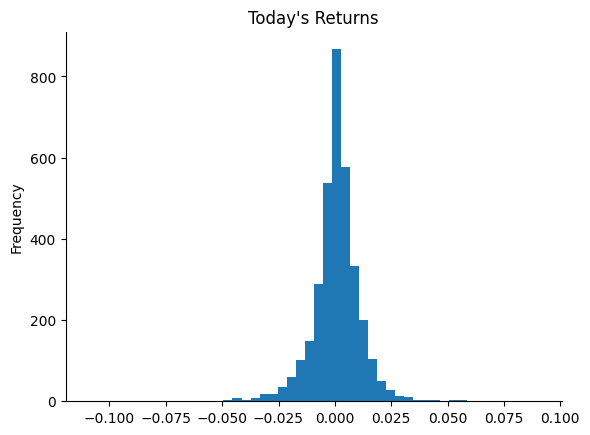

In [8]:
from matplotlib import pyplot as plt
y["Today's Returns"].plot(kind='hist', bins=50, title="Today's Returns")
plt.gca().spines[['top', 'right',]].set_visible(False)

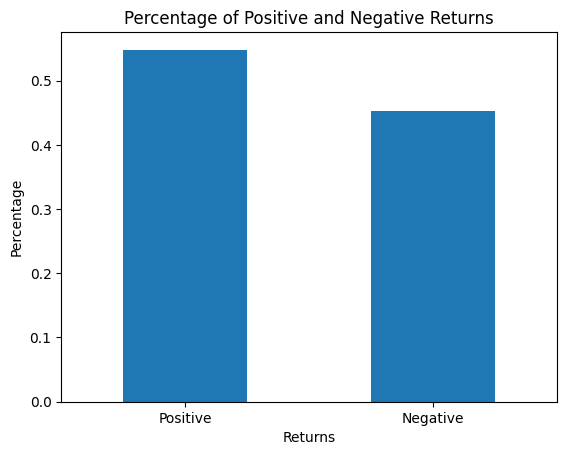

In [11]:
from matplotlib import pyplot as plt

value_counts = n_df_etf["Today's Returns Binary"].value_counts(normalize=True)
value_counts.plot(kind='bar', title="Percentage of Positive and Negative Returns")
plt.xlabel("Returns")
plt.ylabel("Percentage")
plt.xticks([1, 0], ['Negative', 'Positive'], rotation=0)
plt.show()


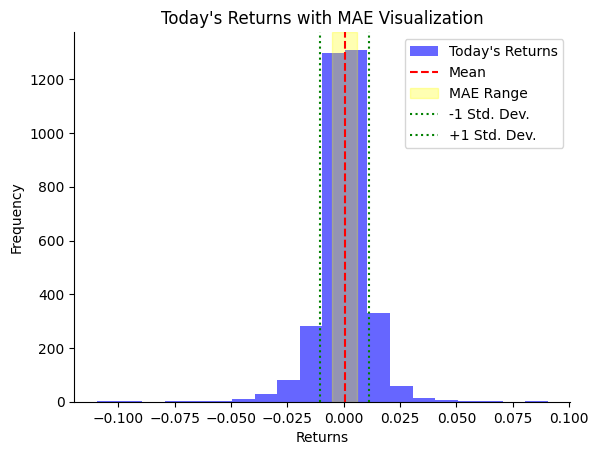

In [ ]:
from matplotlib import pyplot as plt

# Assuming 'y' is your DataFrame and it has been loaded correctly.

# Plotting the histogram of "Today's Returns"
y["Today's Returns"].plot(kind='hist', bins=20, alpha=0.6, color='blue', title="Today's Returns with MAE Visualization")

# Get the mean of "Today's Returns" for accuracy
mean_today_returns = y["Today's Returns"].mean()

# Overlaying MAE around the mean
plt.axvline(x=mean_today_returns, color='red', linestyle='--', label='Mean')
plt.axvspan(mean_today_returns - mae, mean_today_returns + mae, alpha=0.3, color='yellow', label='MAE Range')

# You might already have the std deviation from y.describe(), if not, calculate it
std_today_returns = y["Today's Returns"].std()

# Optional: Overlaying one standard deviation from the mean
plt.axvline(x=mean_today_returns - std_today_returns, color='green', linestyle=':', label='-1 Std. Dev.')
plt.axvline(x=mean_today_returns + std_today_returns, color='green', linestyle=':', label='+1 Std. Dev.')

plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.legend()
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()


In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:absoluteerror',
}

evals = [(dtrain, 'train'), (dtest, 'test')]

bst = xgb.train(params, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=50)

print("Best iteration:", bst.best_iteration)

# Make predictions on the test set
y_pred = bst.predict(dtest)

# Evaluate the model using mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")


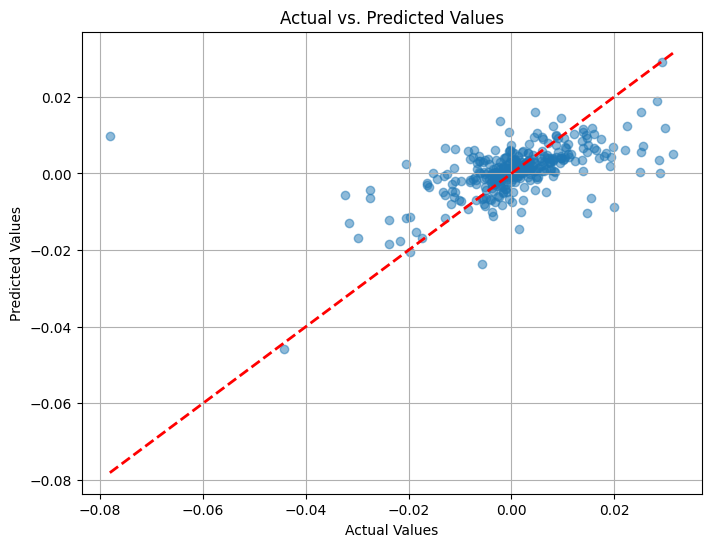

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y_actual = y_test # Your actual values


# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_pred, alpha=0.5)

# Line for perfect predictions
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


In [ ]:
y_pred

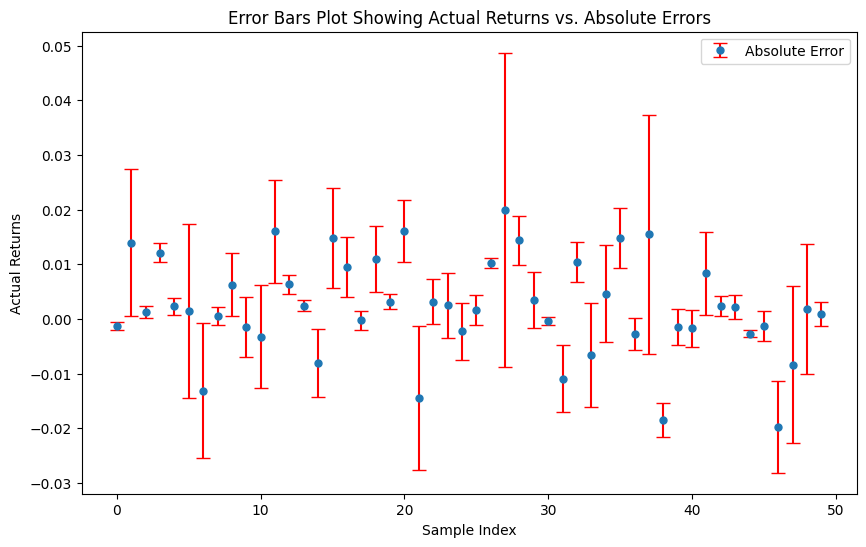

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert y_actual to a numpy array
y_actual_np = np.array(y_actual['Today\'s Returns'])

# Assuming y_pred is already a numpy array and has the same order and length as y_actual_np
# Calculate Absolute Errors
errors = np.abs(y_actual_np - y_pred.flatten())  # Flatten y_pred to ensure it's 1D, just in case

# For a clear visualization, select a subset of 30 random samples
np.random.seed(0)  # For reproducibility
subset_indices = np.random.choice(range(len(errors)), size=50, replace=False)
y_actual_subset = y_actual_np[subset_indices]
y_pred_subset = y_pred.flatten()[subset_indices]
errors_subset = errors[subset_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x=range(len(y_actual_subset)), y=y_actual_subset, yerr=errors_subset, fmt='o', ecolor='r', capsize=5, linestyle='None', label='Absolute Error', markersize=5)

plt.xlabel('Sample Index')
plt.ylabel('Actual Returns')
plt.title('Error Bars Plot Showing Actual Returns vs. Absolute Errors')
plt.legend()
plt.show()


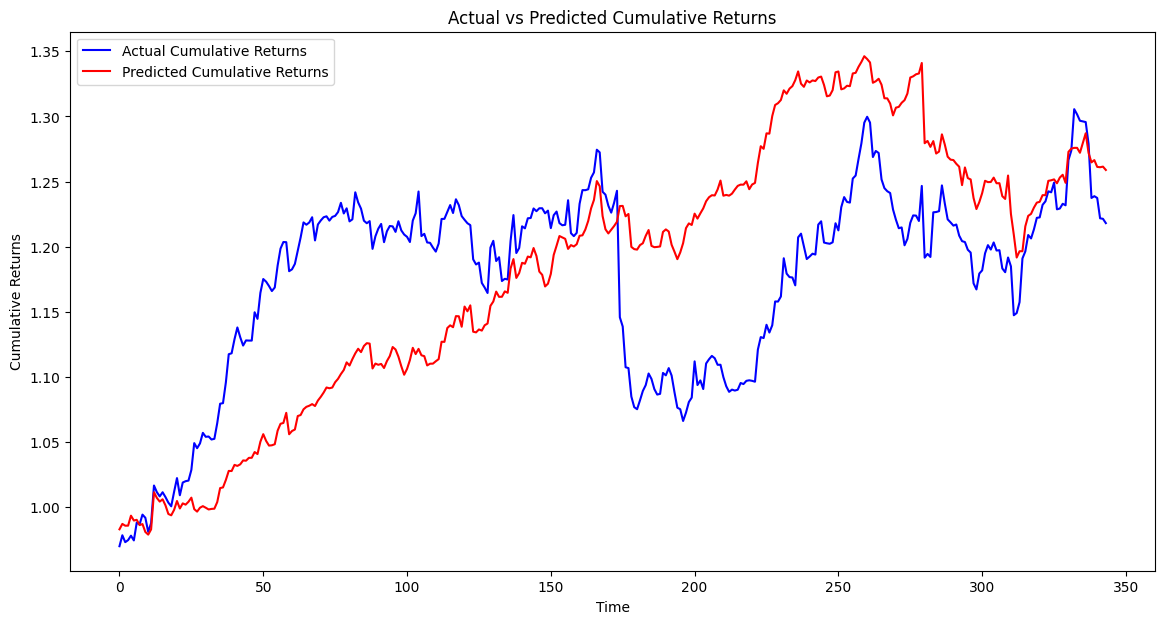

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate Cumulative Returns for both actual and predicted
# Assuming returns are expressed such that 0.01 represents a 1% return
# Adjust by 1 (to make it a growth multiplier) and then compute the cumulative product
cumulative_actual = (1 + y_actual_np).cumprod()
cumulative_pred = (1 + y_pred.flatten()).cumprod()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(cumulative_actual, label='Actual Cumulative Returns', color='blue')
plt.plot(cumulative_pred, label='Predicted Cumulative Returns', color='red')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.title('Actual vs Predicted Cumulative Returns')
plt.legend()
plt.show()


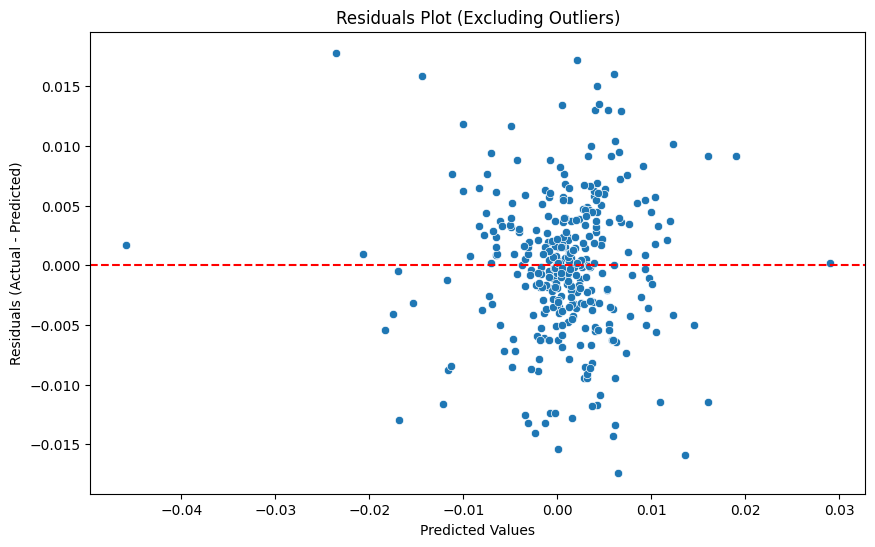

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculating residuals
residuals = y_actual_np - y_pred

# Compute the mean and standard deviation of the residuals
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

# Defining a threshold for outliers (e.g., 2 standard deviations)
threshold = 2 * std_residuals

# Filtering residuals within the threshold
within_threshold = (residuals > (mean_residuals - threshold)) & (residuals < (mean_residuals + threshold))

# Filtering predicted values corresponding to the residuals within the threshold
filtered_y_pred = y_pred[within_threshold]
filtered_residuals = residuals[within_threshold]

# Plotting the filtered residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_y_pred, y=filtered_residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Adds a horizontal line at zero for reference
plt.title('Residuals Plot (Excluding Outliers)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBRegressor

xgb_model = XGBRegressor()
params = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'n_estimators': [100, 500, 1000],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2]
}

random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=20, scoring='neg_mean_absolute_error', cv=5, verbose=1)
random_search.fit(X_train, y_train)

# Print best parameters and lowest MAE
print("Best Parameters:", random_search.best_params_)
print("Lowest MAE:", abs(random_search.best_score_))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Lowest MAE: 0.005626474133491424


Improvement Ideas
* Get a good benchmark number
* More features
  * Function to add $n$ days to the feature set (maybe logarithmic/fibbinacci sequence)
  * Fix fed interest rate
  * Add month (as number, could also try as one-hot encoded)
  * Try different stock indicators (SMA, MACD, OBV, etc)
* Try different models
  * Gabe tried MLP, KNN
  * Nathan tried fancy MLP (tensorflow)
  * maybe try pytorch?
  * Andrew tried Decision trees and Logistic Regression
  * Later we can try ensamble methods
  * Deep learning?
* Try different hyperparameters
